# Непараметрические гипотезы
---
# Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from scipy.stats import norm, t

In [2]:
w = pd.read_table("weight.txt")

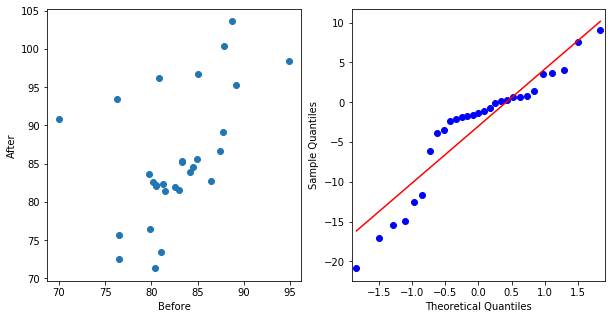

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(w['Before'], w['After'])
ax1.set(xlabel='Before', ylabel='After')
sm.qqplot(w['Before'] - w['After'], line ='s', ax=ax2)
plt.show()

1. Воспользуйтесь критериями знаков (`sign_test` из библиотеки `statsmodels`), критерием Уилкоксона (`wilcoxon` из библиотеки `scipy`). Не забудьте, что мы работаем со связанными выборками!

In [4]:
from scipy.stats import wilcoxon
# Your Code

In [5]:
from statsmodels.stats.descriptivestats import sign_test
# Your Code

2. C помощью бутстрэпа из 10000 повторений постройте доверительный интервал на медиану разницы веса до и после лечения. (в двух вариантах: с помощью `np.random.choice` и с помощью метода `bootstrap` из библиотеки `bootstrapped`)

In [31]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

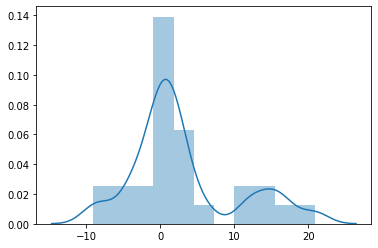

In [32]:
# Distribution of the initial samples
samples = np.array(w["After"] - w["Before"])
sns.distplot(samples)

In [6]:
# Your Code

In [47]:
# Also see the code and formulas
#  https://github.com/facebookincubator/bootstrapped/blob/bd19cae28728aba0ea74e874fad801794a55a363/bootstrapped/bootstrap.py#L78
#  https://en.wikipedia.org/wiki/Bootstrapping_(statistics) 

---
# Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002.
Изменились ли цены?

In [7]:
data = pd.read_table("seattle.txt")
x1 = data[data["Year"] == 2001]["Price"].values
x2 = data[data["Year"] == 2002]["Price"].values

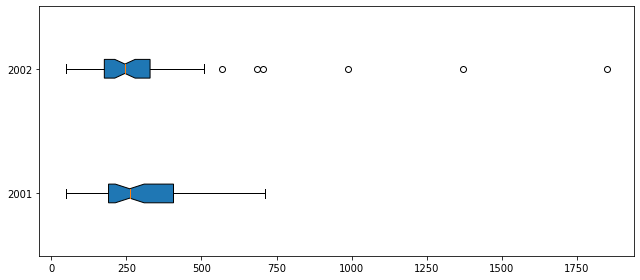

In [8]:
plt.figure(figsize=(9,4))
plt.boxplot([x1, x2], patch_artist=True, notch=True,
                vert=0, labels=['2001', '2002'])
plt.tight_layout()

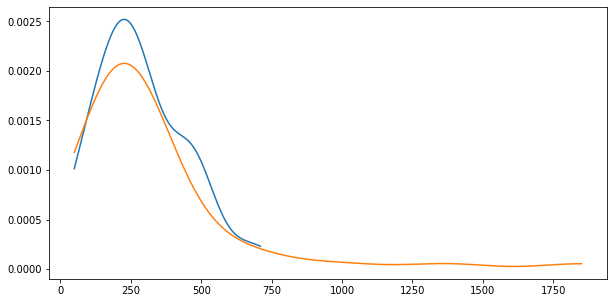

In [10]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10,5))
density_x1 = gaussian_kde(x1)
density_x2 = gaussian_kde(x2)

x_1 = np.linspace(np.min(x1), np.max(x1), 300)
plt.plot(x_1, density_x1(x_1))

x_2 = np.linspace(np.min(x2), np.max(x2), 300)
plt.plot(x_2, density_x2(x_2))

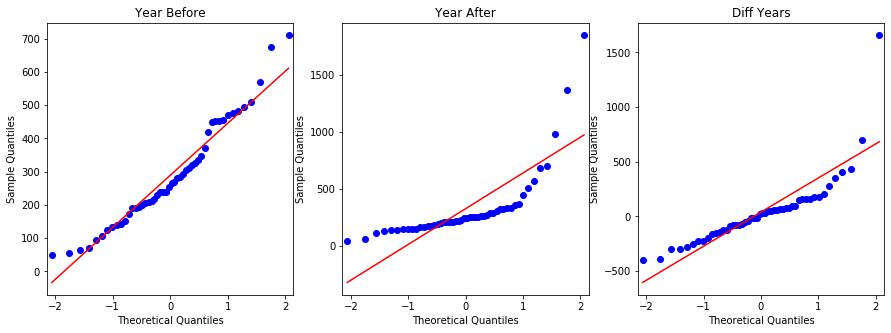

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
sm.qqplot(x1, line ='s', ax=ax1)
sm.qqplot(x2, line ='s', ax=ax2)
sm.qqplot(x2 - x1, line ='s', ax=ax3)

ax1.set_title("Year Before")
ax2.set_title("Year After")
ax3.set_title("Diff Years")
plt.show()

1. Вопсользуйтесь критерием Стьюдента и Манна-Уитни-Уилкоксона (`mannwhitneyu`).

Критерий Манна-Уитни-Уилкоксона:

In [13]:
from scipy.stats import mannwhitneyu
# Your Code

Критерий Стьюдента

In [14]:
from scipy.stats import ttest_ind
# Your Code

2. Постройте доверительные интервалы для средних значений в обеих выборках, а также доверительный интервал для разницы средних по обеим выборкам.

In [15]:
# Your Code

### Изменились ли цены?